In [97]:
# %load K_ex2_3_1.py
# exercise 2.3.1

# Load zipdata.mat
---
This script loads xor.mat (matlab file). xor.mat contains data of ...


## Tags

### Pandas 

drop $\diamond$ between $\diamond$ unique $\diamond$ describe $\diamond$ info $\diamond$ value_counts() $\diamond$ to_frame $\diamond$ sort_index $\diamond$ index.astype $\diamond$ dtypes.value.counts $\diamond$


### Other Python tags

sort (np) $\diamond$

## Structure
1. Load .mat data, convert to pandas dataframe 
2. Get acquainted with/verify you data
3. Assign useful and imporant variables
4. Different pandas operations on the data

## About
**Contact Info** 2021 celiacailloux@gmail.com
 
**Exercise Name** exercise 2.3.1 (course 02450 DTU 2018)

---

In [98]:
# import standard modules
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.neighbors import KNeighborsClassifier
import scipy.linalg as linalg
import numpy as np
import pandas as pd

# 1. Load .mat data, convert to pandas dataframe

## Load .mat file

In [99]:
# Load Matlab data file and extract training set and test set
mat_data = loadmat('../Data/xor.mat')

In [100]:
# Compute the of the dictionary containing .mat data
mat_data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'classNames', 'y', 'attributeNames', 'N', 'M', 'C'])

## Convert .mat dict to pandas dataframe

In [101]:
# Convert to pandas dataframe and add column names
n_cols = mat_data['X'].shape[1]
col_name_y = ['class']
n_cols

2

In [102]:
# mat_data['X']

In [103]:
attributeNames  = mat_data['attributeNames'][0]
col_names_X = list()
for i, col_name in enumerate(attributeNames):
    col_names_X.append(attributeNames[i][0])
attributeNames = col_names_X
col_names    = col_name_y + col_names_X   

In [104]:
data_np = np.concatenate((mat_data['y'], mat_data['X']), axis = 1)

In [105]:
data = pd.DataFrame(data_np,                       
                    columns = col_names )

In [106]:
data.head(10)

,class,Attribute A,Attribute B
0,0.0,0.925716,1.265960
1,0.0,1.165563,1.138794
2,0.0,0.976112,0.985339
3,0.0,0.811825,1.003557
4,0.0,0.964672,1.183650
5,0.0,1.025577,1.106523
6,0.0,0.979267,1.030599
7,0.0,1.108738,1.219585
8,0.0,0.821517,1.184290
9,0.0,0.871085,0.682706


# 2. Get acquainted with/verify you data

In [113]:
# Quick look at statistics 
# Identify any nulls
# Check out data types
# List number of each data type
# data.describe()
data.info(verbose = True, show_counts=True)
# data.dtypes
# data.dtypes.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   class        400 non-null    float64
 1   Attribute A  400 non-null    float64
 2   Attribute B  400 non-null    float64
dtypes: float64(3)
memory usage: 9.5 KB


# 2. Assign useful and imporant variables

Features and classe, length etc (X, y, N, M)

## Assign y  - training and test

In [116]:
# Assign X by dropping the first column
# axis=1 referes to it dropping a column (ie. axis=0 is dropping a row)
# inplace=True means that it works of the original df

y = data[['class']] # importan to use double []

In [117]:
# Show Test Data
y.head(5)

,class
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


## Class names

In [118]:
classNamesList = sorted(y['class'].unique())
classNamesList

[0.0, 1.0]

In [119]:
# Returns a dict where each class is assigned to an int
classDict = dict(zip(classNamesList, range(len(classNamesList))))
classDict

{0.0: 0, 1.0: 1}

In [121]:
# Returns a pandas dataframe
classNames = y[['class']].drop_duplicates().reset_index(drop=True)
classNames

,class
0,0.0
1,1.0


## Assign X - training and test

In [123]:
X = data.drop('class', axis = 1) 

In [124]:
# Check if y and X have the same number of observations (N)
if y.shape[0] == X.shape[0]:
    print('Good job!\n\ty and X have same dimensions!')
else:
    print('Double check y and X!')
    print('\ty shape: {}\nX shape: {}'.format(y.shape, X.shape))

Good job!
	y and X have same dimensions!


In [125]:
# Show Training Data
X.head(5)

,Attribute A,Attribute B
0,0.925716,1.265960
1,1.165563,1.138794
2,0.976112,0.985339
3,0.811825,1.003557
4,0.964672,1.183650


## Dimensionality constants
* Number of observations *N*
* Number of Attributes *M*
* Number of classes *C*

In [129]:
# Compute values of N, M and C.
N = len(y)        # number of observations
M = X.shape[1]
C = len(classNames)     # number of classes

# 3. Different pandas operations on the data

## Train data

In [ ]:
# show only classes between i and j
# i = 0
# j = 9
# test_between = train_data[train_data['class'].between(i,j)]
# test_between.head()

In [134]:
# Returns the uniques and sorts them
uniques = y['class'].unique()
uniques.sort()  # uncomment to sort
uniques

array([0., 1.])

In [136]:
# Count how many times you the unique values in 'class' apears
unique_counts = y['class'].value_counts().to_frame('counts')
# unique_counts.index.name = 'class'
unique_counts.sort_index(inplace = True)
unique_counts['class'] = unique_counts.index.astype('int32')

In [137]:
unique_counts

,counts,class
0.0,200,0
1.0,200,1


([<matplotlib.axis.XTick at 0x7fa0b87cce50>,
 [Text(0, 0, ''), Text(0, 0, '')])

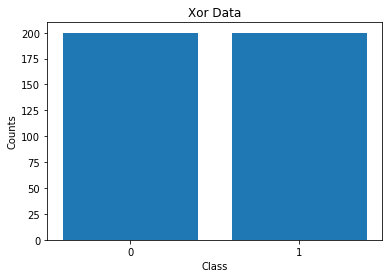

In [142]:
plt.bar(unique_counts['class'], unique_counts['counts'])
plt.title('Xor Data')
plt.xlabel('Class')
plt.ylabel('Counts')
plt.xticks(range(C))

In [ ]:
# unique_counts.index

## Test data

In [ ]:
# Returns the uniques and sort
uniques_test = test_data['class'].unique()
uniques_test.sort()  # uncomment to sort
# Count how many times you the unique values in 'class' apears
unique_counts_test = test_data['class'].value_counts().to_frame('counts')
unique_counts_test.sort_index(inplace = True) # sort it by index
unique_counts_test['class'] = unique_counts.index.astype('int32') # convert to integer
unique_counts_test

In [ ]:
plt.bar(unique_counts_test['class'], unique_counts_test['counts'])
plt.title('Test Data')
plt.xlabel('Digit')
plt.ylabel('Counts')

## Return all digits values that appear less than 600 times

In [ ]:
# find "anomaly" find that class, where the counts are less than 600
[_class for _class in unique_counts.index if len(test_between[test_between['class'] == _class]) <= 600]

# 5. Message printet when running the script

In [ ]:
print('----------------------------------------')
print('Zip Data Succesfully Loaded')
print('Run %whos to view all imported variables')
print('----------------------------------------')